## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [3]:
# replace interrogation marks by NaN values

data = data.replace('?', np.nan)

In [4]:
data["cabin"].unique()

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [5]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [6]:
data["name"]

0                         Allen, Miss. Elisabeth Walton
1                        Allison, Master. Hudson Trevor
2                          Allison, Miss. Helen Loraine
3                  Allison, Mr. Hudson Joshua Creighton
4       Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
                             ...                       
1304                               Zabour, Miss. Hileni
1305                              Zabour, Miss. Thamine
1306                          Zakarian, Mr. Mapriededer
1307                                Zakarian, Mr. Ortin
1308                                 Zimmerman, Mr. Leo
Name: name, Length: 1309, dtype: object

In [7]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [8]:
data["title"]

0         Miss
1       Master
2         Miss
3           Mr
4          Mrs
         ...  
1304      Miss
1305      Miss
1306        Mr
1307        Mr
1308        Mr
Name: title, Length: 1309, dtype: object

In [9]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [10]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [11]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [12]:
target = 'survived'

In [13]:
vars_num = [n for n in data.columns if data[n].dtypes != 'O' and n!=target]

vars_cat = [n for n in data.columns if data[n].dtypes == 'O']

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


In [14]:
print(vars_cat,vars_num)

['sex', 'cabin', 'embarked', 'title'] ['pclass', 'age', 'sibsp', 'parch', 'fare']


### Find missing values in variables

In [15]:
# first in numerical variables
data[vars_num].isnull().mean()



pclass    0.000000
age       0.200917
sibsp     0.000000
parch     0.000000
fare      0.000764
dtype: float64

In [16]:
# now in categorical variables
data[vars_cat].isnull().mean()


sex         0.000000
cabin       0.774637
embarked    0.001528
title       0.000000
dtype: float64

### Determine cardinality of categorical variables

In [17]:
# All the categorical variables ,but "Cabin" ,show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

### Determine the distribution of numerical variables

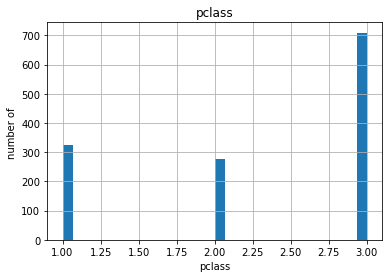

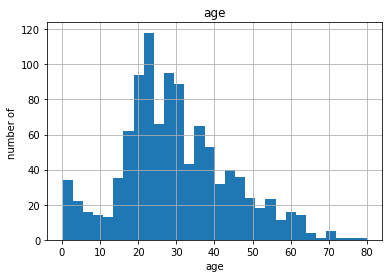

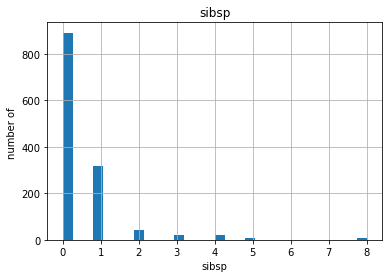

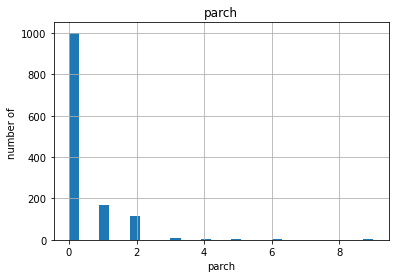

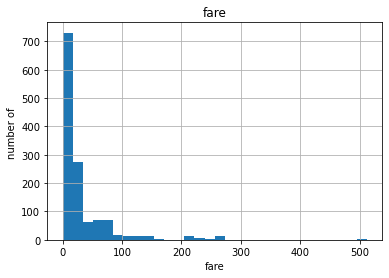

In [18]:
def analyse_continuos(df,var):
    df = df.copy()
    df[var].hist(bins=30)
    plt.ylabel("number of ")
    plt.xlabel(var)
    plt.title(var)
    plt.show()

for var in vars_num:
    analyse_continuos(data,var)

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [20]:
# split a word into a list
def extract_letter(row):    
    try:
        return list(row)[0]
    except:
        return np.nan

X_train["cabin"] = X_train["cabin"].apply(extract_letter)
X_test["cabin"] = X_test["cabin"].apply(extract_letter)

In [21]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr
44,1,female,41.0000,0,0,134.5000,E,C,Miss
1072,3,male,NaN,0,0,7.7333,NaN,Q,Mr
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss
835,3,male,NaN,0,0,8.0500,NaN,S,Mr
1216,3,female,NaN,0,0,7.7333,NaN,Q,Miss
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [22]:
# make a list with numerical variables with Nan
vars_with_nan = [
    n for n in data.columns 
    if data[n].isnull().sum() > 0 and data[n].dtype != 'O']

In [23]:
# print percentage of missing values
data[vars_with_nan].isnull().mean()

age     0.200917
fare    0.000764
dtype: float64

In [24]:
# replace missing values as suggested below
for var in vars_with_nan:
    #calculate median
    median_val = X_train[var].median()
    #create a binany missin indicator
    X_train[var+"_nan"] = np.where(X_train[var].isnull(),1,0)
    X_test[var+"_nan"] = np.where(X_test[var].isnull(),1,0)
    #replace missin value with median
    X_train[var] = X_train[var].fillna(median_val)
    X_test[var] = X_test[var].fillna(median_val)


In [25]:
X_train

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_nan,fare_nan
1118,3,male,25.0000,0,0,7.9250,NaN,S,Mr,0,0
44,1,female,41.0000,0,0,134.5000,E,C,Miss,0,0
1072,3,male,28.0000,0,0,7.7333,NaN,Q,Mr,1,0
1130,3,female,18.0000,0,0,7.7750,NaN,S,Miss,0,0
574,2,male,29.0000,1,0,21.0000,NaN,S,Mr,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,3,female,0.1667,1,2,20.5750,NaN,S,Miss,0,0
835,3,male,28.0000,0,0,8.0500,NaN,S,Mr,1,0
1216,3,female,28.0000,0,0,7.7333,NaN,Q,Miss,1,0
559,2,female,20.0000,0,0,36.7500,NaN,S,Miss,0,0


In [26]:
#check if any missing values
X_train[vars_with_nan].isnull().sum()

age     0
fare    0
dtype: int64

### Categorical variables
For categorical variables, we will replace missing values with the string "missing".

In [27]:
# list categorical variables with missin values
vars_with_nan = [
    n for n in data.columns 
    if data[n].isnull().sum() > 0 and n not in vars_num]

# print percentage of missing values
data[vars_with_nan].isnull().mean()

cabin       0.774637
embarked    0.001528
dtype: float64

In [28]:
# replace missin values with "missing"
for var in vars_with_nan:
    X_train[var] = X_train[var].fillna("Missing")
    X_test[var] = X_test[var].fillna("Missing")

In [29]:
X_train[vars_with_nan].isnull().sum()

cabin       0
embarked    0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [30]:
def find_frequent_labels(df, var, rare_perc):
    
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset

    df = df.copy()

    tmp = df[var].value_counts(normalize=True)

    return tmp[tmp > rare_perc].index


for var in vars_cat:
    
    # find the frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.01)
    
    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(
        frequent_ls), X_train[var], 'Rare')
    
    X_test[var] = np.where(X_test[var].isin(
        frequent_ls), X_test[var], 'Rare')

In [31]:
for var in vars_cat:
    print(X_train[var].value_counts(normalize=True))

male      0.633238
female    0.366762
Name: sex, dtype: float64
Missing    0.766953
C          0.074499
B          0.049666
D          0.034384
E          0.034384
A          0.018147
F          0.017192
Rare       0.004776
Name: cabin, dtype: float64
S       0.709647
C       0.195798
Q       0.092646
Rare    0.001910
Name: embarked, dtype: float64
Mr        0.569245
Miss      0.200573
Mrs       0.159503
Master    0.044890
Other     0.025788
Name: title, dtype: float64


### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding


In [32]:
X_train = pd.get_dummies(X_train,columns=vars_cat,drop_first=True)
X_test = pd.get_dummies(X_test,columns=vars_cat,drop_first=True)

### Scale the variables

- Use the standard scaler from Scikit-learn

In [33]:
# we have to drop one column (embarked rare) which is not in X_test
X_train.shape

(1047, 22)

In [34]:
X_test.shape

(262, 21)

In [35]:
# drop embarqued rare (it is not in xtest)
X_train.drop("embarked_Rare",axis=1,inplace=True)

In [36]:
# capture all variables in a list
train_vars = X_train.columns.tolist()

In [37]:
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[train_vars]) 

# transform the train and test set
X_train[train_vars] = scaler.transform(X_train[train_vars])

X_test[train_vars] = scaler.transform(X_test[train_vars])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [38]:
log_model = LogisticRegression(random_state=0,C=0.0005).fit(X_train, y_train)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [39]:
# make predictions for test set
class_ = log_model.predict(X_train)
pred = log_model.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = log_model.predict(X_test)
pred = log_model.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8443817619783617
train accuracy: 0.7182425978987583

test roc-auc: 0.8394753086419753
test accuracy: 0.6984732824427481



That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**